<a href="https://colab.research.google.com/github/bwillow1222/ds4002MI3P2/blob/main/ViewershipModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

NFLdata = pd.read_csv('https://raw.githubusercontent.com/bwillow1222/ds4002MI3P2/refs/heads/main/DATA/NFL.csv')
NBAdata = pd.read_csv('https://raw.githubusercontent.com/bwillow1222/ds4002MI3P2/refs/heads/main/DATA/NBA.csv')
MLBdata = pd.read_csv('https://raw.githubusercontent.com/bwillow1222/ds4002MI3P2/refs/heads/main/DATA/MLB.csv')
NHLdata = pd.read_csv('https://raw.githubusercontent.com/bwillow1222/ds4002MI3P2/refs/heads/main/DATA/NHL.csv')



    Year  Forecasted Viewership  Actual Viewership  Percentage Difference (%)
31  2021              99.007179              91.63                  -7.451155
32  2022              98.278272              99.18                   0.917525
33  2023              97.695147             115.10                  17.815473
34  2024              97.228647             123.40                  26.917327


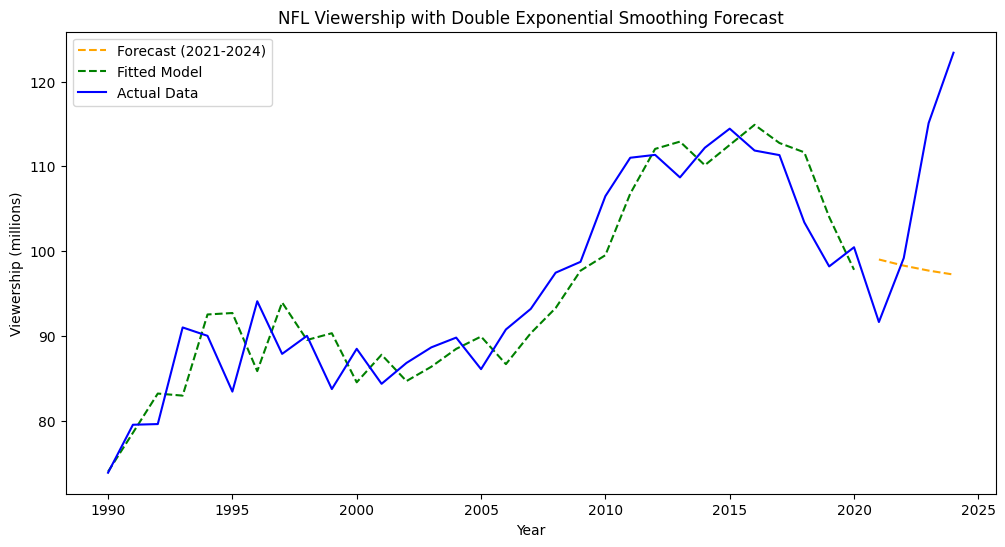

In [33]:
# NFL

# Train the model on data up to 2020
train_data = NFLdata[NFLdata['Year'] <= 2020]
model = ExponentialSmoothing(train_data['Viewership (millions)'], trend='add', seasonal=None, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)

# Forecast from 2021 to 2024
forecast = model.forecast(4)

# Extract actual viewership from 2021 to 2024
actual_viewership = NFLdata[NFLdata['Year'].isin([2021, 2022, 2023, 2024])]['Viewership (millions)']

# Calculate the percentage difference between actual and forecasted viewership
percentage_diff = ((actual_viewership.values - forecast) / forecast) * 100

# Display the differences
diff_df = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024],
    'Forecasted Viewership': forecast,
    'Actual Viewership': actual_viewership.values,
    'Percentage Difference (%)': percentage_diff
})

diff_df.to_csv('nfl_viewership_forecast_vs_actual.csv', index=False)

print(diff_df)

# Plot the model, forecast, and actual data
plt.figure(figsize=(12, 6))
#plt.plot(train_data['Year'], train_data['Viewership (millions)'], label='Training Data')
plt.plot(range(2021, 2025), forecast, label='Forecast (2021-2024)', color='orange', linestyle="--")
plt.plot(train_data['Year'], model.fittedvalues, label='Fitted Model', color='green', linestyle="--")
plt.plot(NFLdata['Year'], NFLdata['Viewership (millions)'], label='Actual Data', color='blue')
plt.xlabel('Year')
plt.ylabel('Viewership (millions)')
plt.title('NFL Viewership with Double Exponential Smoothing Forecast')
plt.legend()
plt.show()

    Year  Forecasted Viewership  Actual Viewership  Percentage Difference (%)
18  2020              15.257095               7.50                 -50.842542
19  2021              14.864114               9.91                 -33.329358
20  2022              14.549729              12.40                 -14.775044
21  2023              14.298221              11.64                 -18.591271
22  2024              14.097015              11.30                 -19.841185


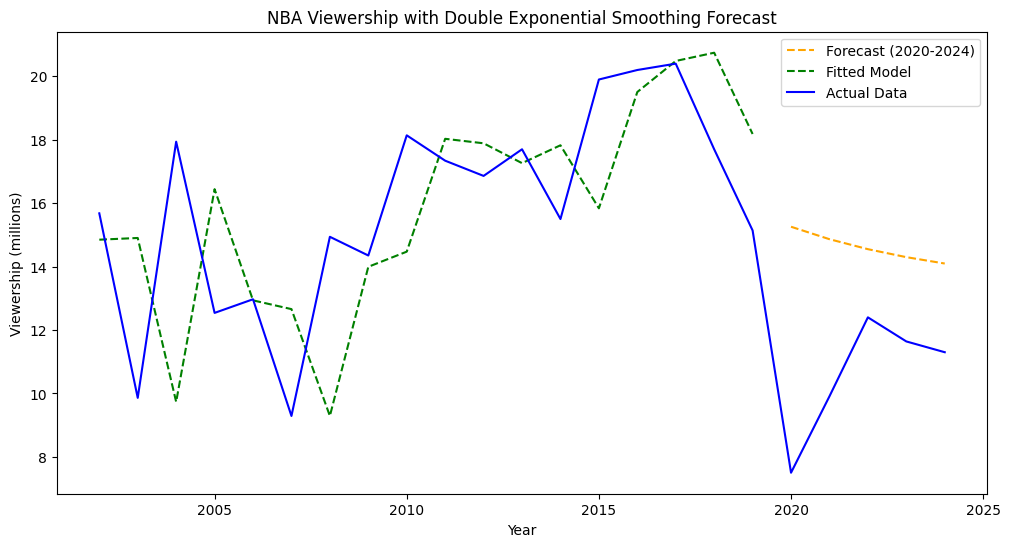

In [34]:
# NBA

# Train the model on data up to 2019
train_data = NBAdata[NBAdata['Year'] <= 2019]
model = ExponentialSmoothing(train_data['Viewership (millions)'], trend='add', seasonal=None, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)

# Forecast from 2020 to 2024
forecast = model.forecast(5)

# Extract actual viewership from 2021 to 2024
actual_viewership = NBAdata[NBAdata['Year'].isin([2020, 2021, 2022, 2023, 2024])]['Viewership (millions)']

# Calculate the percentage difference between actual and forecasted viewership
percentage_diff = ((actual_viewership.values - forecast) / forecast) * 100

# Display the differences
diff_df = pd.DataFrame({
    'Year': [2020, 2021, 2022, 2023, 2024],
    'Forecasted Viewership': forecast,
    'Actual Viewership': actual_viewership.values,
    'Percentage Difference (%)': percentage_diff
})

diff_df.to_csv('nba_viewership_forecast_vs_actual.csv', index=False)


print(diff_df)

# Plot the model, forecast, and actual data
plt.figure(figsize=(12, 6))
#plt.plot(train_data['Year'], train_data['Viewership (millions)'], label='Training Data')
plt.plot(range(2020, 2025), forecast, label='Forecast (2020-2024)', color='orange', linestyle="--")
plt.plot(train_data['Year'], model.fittedvalues, label='Fitted Model', color='green', linestyle="--")
plt.plot(NBAdata['Year'], NBAdata['Viewership (millions)'], label='Actual Data', color='blue')
plt.xlabel('Year')
plt.ylabel('Viewership (millions)')
plt.title('NBA Viewership with Double Exponential Smoothing Forecast')
plt.legend()
plt.show()

    Year  Forecasted Viewership  Actual Viewership  Percentage Difference (%)
20  2020              13.633068               9.94                 -27.089044
21  2021              13.255414              11.75                 -11.356977
22  2022              12.953292              11.80                  -8.903464
23  2023              12.711594               9.11                 -28.333140


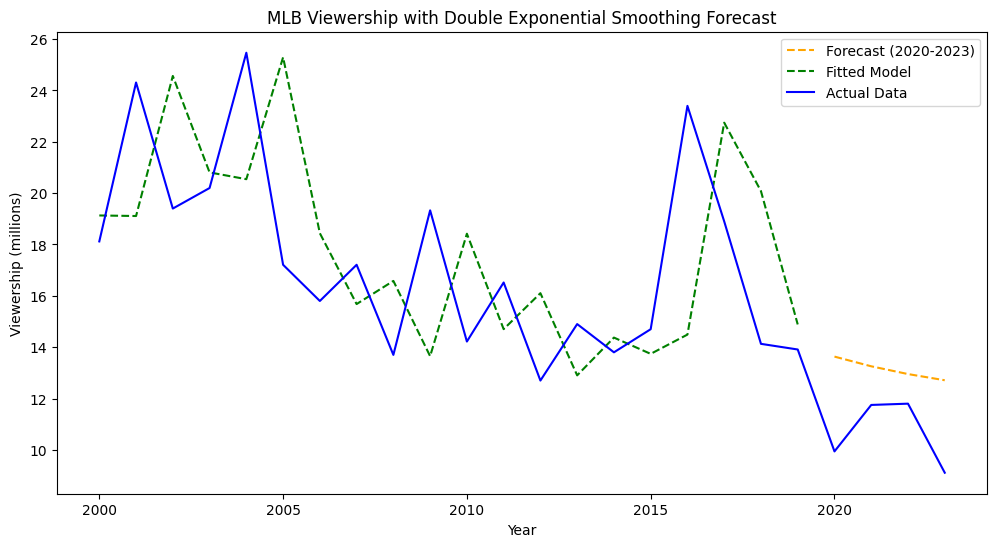

In [35]:
# MLB

# Train the model on data up to 2019
train_data = MLBdata[MLBdata['Year'] <= 2019]
model = ExponentialSmoothing(train_data['Viewership (millions)'], trend='add', seasonal=None, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)

# Forecast from 2020 to 2023
forecast = model.forecast(4)

# Extract actual viewership from 2021 to 2024
actual_viewership = MLBdata[MLBdata['Year'].isin([2020, 2021, 2022, 2023])]['Viewership (millions)']

# Calculate the percentage difference between actual and forecasted viewership
percentage_diff = ((actual_viewership.values - forecast) / forecast) * 100

# Display the differences
diff_df = pd.DataFrame({
    'Year': [2020, 2021, 2022, 2023],
    'Forecasted Viewership': forecast,
    'Actual Viewership': actual_viewership.values,
    'Percentage Difference (%)': percentage_diff
})

diff_df.to_csv('mlb_viewership_forecast_vs_actual.csv', index=False)

print(diff_df)


# Plot the model, forecast, and actual data
plt.figure(figsize=(12, 6))
#plt.plot(train_data['Year'], train_data['Viewership (millions)'], label='Training Data')
plt.plot(range(2020, 2024), forecast, label='Forecast (2020-2023)', color='orange', linestyle="--")
plt.plot(train_data['Year'], model.fittedvalues, label='Fitted Model', color='green', linestyle="--")
plt.plot(MLBdata['Year'], MLBdata['Viewership (millions)'], label='Actual Data', color='blue')
plt.xlabel('Year')
plt.ylabel('Viewership (millions)')
plt.title('MLB Viewership with Double Exponential Smoothing Forecast')
plt.legend()
plt.show()

    Year  Forecasted Viewership  Actual Viewership  Percentage Difference (%)
12  2020               5.296032               2.15                 -59.403568
13  2021               5.360070               2.43                 -54.664771
14  2022               5.411300               4.59                 -15.177504
15  2023               5.452285               2.60                 -52.313569


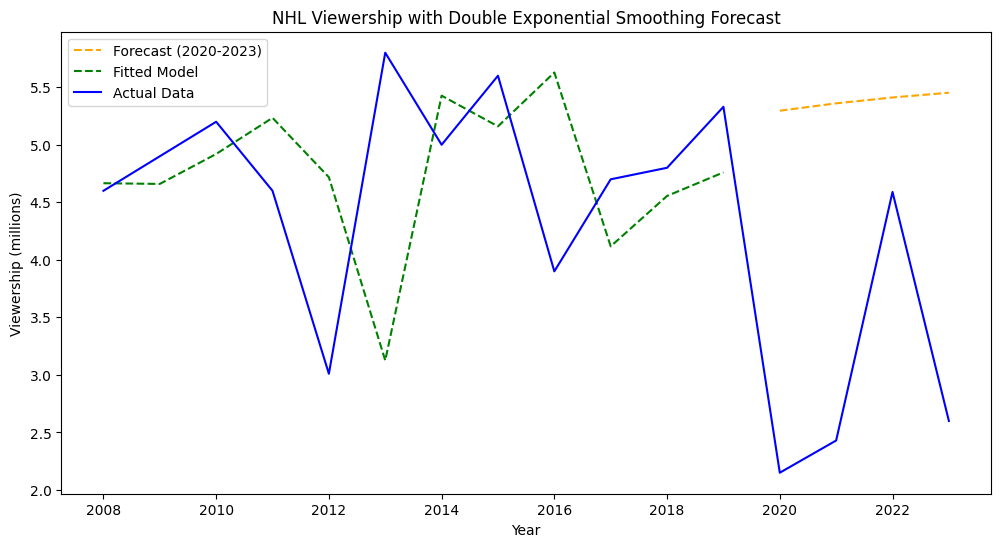

In [36]:
# NHL

# Train the model on data up to 2019
train_data = NHLdata[NHLdata['Year'] <= 2019]
model = ExponentialSmoothing(train_data['Viewership (millions)'], trend='add', seasonal=None, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)

# Forecast from 2020 to 2024
forecast = model.forecast(4)

# Extract actual viewership from 2021 to 2024
actual_viewership = NHLdata[NHLdata['Year'].isin([2020, 2021, 2022, 2023])]['Viewership (millions)']

# Calculate the percentage difference between actual and forecasted viewership
percentage_diff = ((actual_viewership.values - forecast) / forecast) * 100

# Display the differences
diff_df = pd.DataFrame({
    'Year': [2020, 2021, 2022, 2023],
    'Forecasted Viewership': forecast,
    'Actual Viewership': actual_viewership.values,
    'Percentage Difference (%)': percentage_diff
})

diff_df.to_csv('nhl_viewership_forecast_vs_actual.csv', index=False)

print(diff_df)

# Plot the model, forecast, and actual data
plt.figure(figsize=(12, 6))
#plt.plot(train_data['Year'], train_data['Viewership (millions)'], label='Training Data')
plt.plot(range(2020, 2024), forecast, label='Forecast (2020-2023)', color='orange', linestyle="--")
plt.plot(train_data['Year'], model.fittedvalues, label='Fitted Model', color='green', linestyle="--")
plt.plot(NHLdata['Year'], NHLdata['Viewership (millions)'], label='Actual Data', color='blue')
plt.xlabel('Year')
plt.ylabel('Viewership (millions)')
plt.title('NHL Viewership with Double Exponential Smoothing Forecast')
plt.legend()
plt.show()